# 6.5 Machine Learning Part 2

### 01. Importing libraries and data
### 02. Data cleaning
### 03. Elbow techniques
### 04. K-means clustering

# 01. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/brianyoo/Downloads/CF'

In [4]:
df_clean = pd.read_csv(os.path.join(path, 'Task 6.1', 'USA_cars_datasets.csv'))

In [5]:
df_clean.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,state,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,10 days
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,6 days
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,2 days
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,22 hours
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,22 hours


# 02. Data cleaning

In [6]:
df_clean = df_clean.drop(['Unnamed: 0'], axis = 1)

In [7]:
df_clean.head()

,price,brand,model,year,title_status,mileage,color,state,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,10 days
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,6 days
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,2 days
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,22 hours
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,22 hours


In [8]:
df_n = df_clean[['price', 'year', 'mileage']]

In [9]:
df_n.head()

,price,year,mileage
0,6300,2008,274117.0
1,2899,2011,190552.0
2,5350,2018,39590.0
3,25000,2014,64146.0
4,27700,2018,6654.0


In [10]:
df_n.shape

(2456, 3)

# 03. Elbow techniques

In [11]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [12]:
score = [kmeans[i].fit(df_n).score(df_n) for i in range(len(kmeans))]
score

[-7671239472694.406,
 -4065946182584.0503,
 -1922325078474.551,
 -1195520922202.2363,
 -887568419339.9742,
 -662410090127.5605,
 -551686685496.3743,
 -467700722588.91864,
 -394952607465.8203]

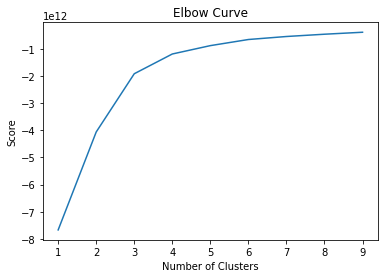

In [13]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

A noticable straighten line on the x-axis was found after 4. Therefore, the optimal count for your clusters is 4

# 04. K-means clustering

In [14]:
kmeans = KMeans(n_clusters = 4) 

In [15]:
kmeans.fit(df_n)

KMeans(n_clusters=4)

In [16]:
df_n['clusters'] = kmeans.fit_predict(df_n)

/var/folders/r6/p5vtydpn7y13mfc6k8mg60_w0000gn/T/ipykernel_98501/3294369195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['clusters'] = kmeans.fit_predict(df_n)


In [17]:
df_n.head()

,price,year,mileage,clusters
0,6300,2008,274117.0,1
1,2899,2011,190552.0,1
2,5350,2018,39590.0,0
3,25000,2014,64146.0,3
4,27700,2018,6654.0,0


In [18]:
df_n['clusters'].value_counts()

0    1817
3     506
1     130
2       3
Name: clusters, dtype: int64

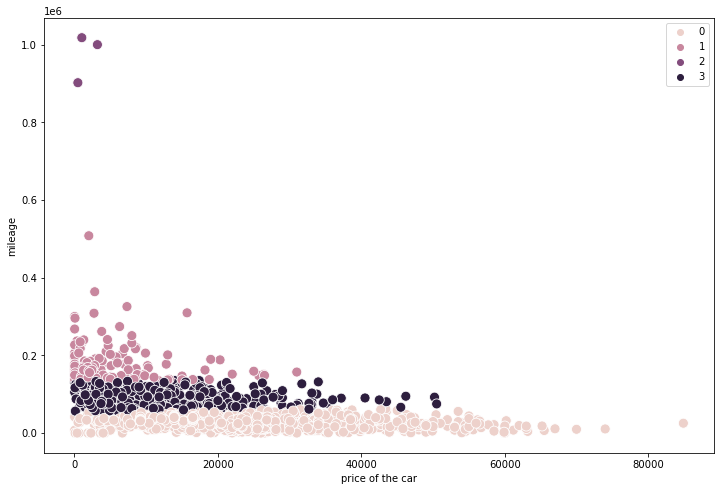

In [19]:
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_n['price'], y = df_n['mileage'], hue = kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('price of the car') 
plt.ylabel('mileage')
plt.show()

Theses grouped scatter plots show the relationship of car price and the mileage. Total 4 groups are being presented 
above and each group give clear insight. The group which has the largest range is cluster 0. Cluster 0 covers almost all of price range but its mileage range is pretty narrow. Cluster 3's milage range is little bit bigger than 0 and its price range is relatively narrow than cluster 0. Cluster 1 has the largest range of mileage but has smallest range of the price. The last cluster, 2, has only 3 plots and its mileage is bigger than any other cluster and price is cheper than any other clusters. If future customers can see this scatterplot, I would recommen browsing and buying a car within cluster 0.

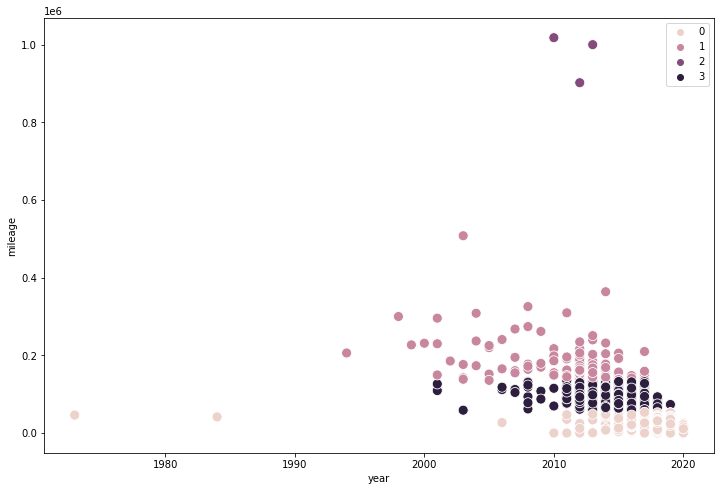

In [20]:
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_n['year'], y = df_n['mileage'], hue = kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('year') 
plt.ylabel('mileage')
plt.show()

All 4 clusters are well represented above. If I compare cluster 0, 3, and 1, the cars have relatively low mileage came out in relatively recent years. It may imply young generation's consumin pattern.

In [21]:
df_n.loc[df_n['clusters'] == 0, 'clusters'] = "Light Pink"
df_n.loc[df_n['clusters'] == 1, 'clusters'] = 'Pink'
df_n.loc[df_n['clusters'] == 2, 'clusters'] = 'Light Purple'
df_n.loc[df_n['clusters'] == 3, 'clusters'] = 'Purple'

/var/folders/r6/p5vtydpn7y13mfc6k8mg60_w0000gn/T/ipykernel_98501/499184376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n.loc[df_n['clusters'] == 0, 'clusters'] = "Light Pink"


In [22]:
df_n.groupby('clusters').agg({'price' : ['median', 'mean'],
                             'mileage' : ['median', 'mean'],
                             'year' : ['median', 'mean']})

price                 mileage                   year  \
               median          mean    median           mean  median   
clusters                                                               
Light Pink    20300.0  21992.737479   28918.0   28356.622455  2019.0   
Light Purple   1025.0   1566.666667  999999.0  973325.333333  2012.0   
Pink           4100.0   5998.176923  163297.0  180938.861538  2012.0   
Purple        10100.0  12164.316206   86312.5   89145.551383  2015.0   

                           
                     mean  
clusters                   
Light Pink    2018.008255  
Light Purple  2011.666667  
Pink          2010.769231  
Purple        2014.677866

Each clusters statistical info of price, mieage, an year was well described by using groupby() function. With this intuitive chart, I could get more ideas tha could get more insights by using different types of visualization.